<a href="https://colab.research.google.com/github/lapshinaaa/applied-statistics-tasks/blob/main/AS1_AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="800">

# A/B Testing
</center>

**Lapshina Anastasiia**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict

На семинаре мы попытались разобраться как устроена процедура АБ-тестирования. В этом задании мы попытаемся закрепить полученные знания и более аккуратно структурировать их.

### Кратко повторим теорию

Мы хотим выктить новую функциональность на сайте. Перед раскаткой нам хочется проверить, какой эффект мы оказываем на пользователя. Выделим две выборки: тестовую (treatment) и контрольную (control). Тестовой покажем новый сайт. Контрольной старый. Замерим инетерсующую нас метрику, нааример, время проведенной на сайте, в обеих группах:

$$
\begin{aligned}
&X^c_1, \ldots, X^c_{n_c} \sim iid (\mu_c, \sigma^2_c) \\
&X^t_1, \ldots, X^t_{n_t} \sim iid (\mu_t, \sigma^2_t)
\end{aligned}
$$

У выборок есть какие-то математические ожидания, дисперсии. Выборки собраны независимо друг от друга. Если их математические ожидания одинаковые, будем считать, что новая функциональность никак не повлияла на пользователей. Сформулируем это в виде нашей нулевой гипотезы:

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_c = \mu_t \\
&H_1: \hspace{2mm} \mu_c < \mu_t.
\end{aligned}
$$

Посчитаем по выборке расстояние между математическими ожиданиями $\hat \mu_t - \hat \mu_c$. Оно по ЦПТ имеет нормальное распределение с оценкой дисперсии $\frac{\hat{\sigma}^2_t}{n_t} + \frac{\hat{\sigma}^2_c}{n_c}$. Получается, что

$$
z = \frac{\hat \mu_t - \hat \mu_c}{\sqrt{\frac{\hat{\sigma}^2_t}{n_t} + \frac{\hat{\sigma}^2_c}{n_c}}} \sim N(0,1),
$$

при верности нулевой гипотезы и $n \to \infty$. Если это расстояние оказывается слишком большим, мы отказываемся верить в нулевую гипотезу. Эффект от новой функциональности есть. Будем сравнивать наблюдаемое значение $z$ с $z_{1 - \alpha},$ где уровень значимости $\alpha$ выберем до начала эксперимента.

- Если $z < z_{1 - \alpha},$ нулевая гипотеза не отвергается (похоже, что верна). Расстояние маленькое, разницы нет.
- Если $z > z_{1 - \alpha},$ выбираем альтернативу. У на есть значимый эффект на метрику, от веры в нулевую гипотезу придётся отказаться.

> Ничего не понятно? Тогда вам в лекции. Ниже подборка:  

- [Наша лекция про АБ]( )
- [Неделя про проверку гипотез с курсеры](https://www.youtube.com/watch?v=Zv-5gbJtofk&list=PLCf-cQCe1FRxTgNPwcRSkBjvtE8DEm7rU)


## Задания


__а) [1 балл]__ Реализуйте функцию для проверки гипотезы о равенстве математических ожиданий. Она должна принимать на вход две выборки и выдавать на выход наблюдаемое значение статистики `z_obs` и `p_value` для ситуаций с разными альтернативными гипотезами.

In [2]:
def asy_mean_test(x_control, x_treatment, alternative = 'larger'):
    # calculating the number of observations in each group
    n_control = len(x_control)
    n_treatment = len(x_treatment)

    # calculating z_obs
    exp_diff = np.mean(x_treatment) - np.mean(x_control)
    var_control = np.var(x_control, ddof = 1)
    var_treatment = np.var(x_treatment, ddof = 1)

    z_obs = exp_diff / np.sqrt((var_treatment / n_treatment) + (var_control / n_control))

    # calculating p_value
    if alternative == 'larger':
        p_value = 1 - stats.norm.cdf(z_obs)
    elif alternative == 'smaller':
        p_value = stats.norm.cdf(z_obs)

    return z_obs, p_value

Если вы написали весь код выше корректно, то строки ниже сработают без проблем.

In [3]:
def gen_sample(n_obs, effect, p_control):
    p_treatment = p_control * (1 + effect)
    x_control = stats.bernoulli(p_control).rvs(n_obs)
    x_treatment = stats.bernoulli(p_treatment).rvs(n_obs)
    return x_control, x_treatment

In [4]:
# Проверка ситуации, когда верна нулевая гипотеза
_, pval = asy_mean_test(*gen_sample(10**5, 0, 0.2))
assert pval > 0.01

In [5]:
# Проверка ситуации, когда верна нулевая гипотеза
_, pval = asy_mean_test(*gen_sample(10**5, 0.1, 0.2))
assert pval < 0.01

Для простоты мы дальше будем работать с односторонней альтернативой и тестом для долей.

$$
\begin{aligned}
&H_0: \hspace{2mm} p_t = p_c \\
&H_1: \hspace{2mm} p_t > p_c
\end{aligned}
$$

__б) [2 балла]__ Предположим, что нулевая гипотеза верна. Как при верности нулевой гипотезы будут распределены `pvalue` и `z_obs`?  

С помощью симуляций сгенерируйте $10^4$ выборок размера $1000$, постройте две гистограммы.

In [6]:
n_sim = 10000
sample_size = 1000

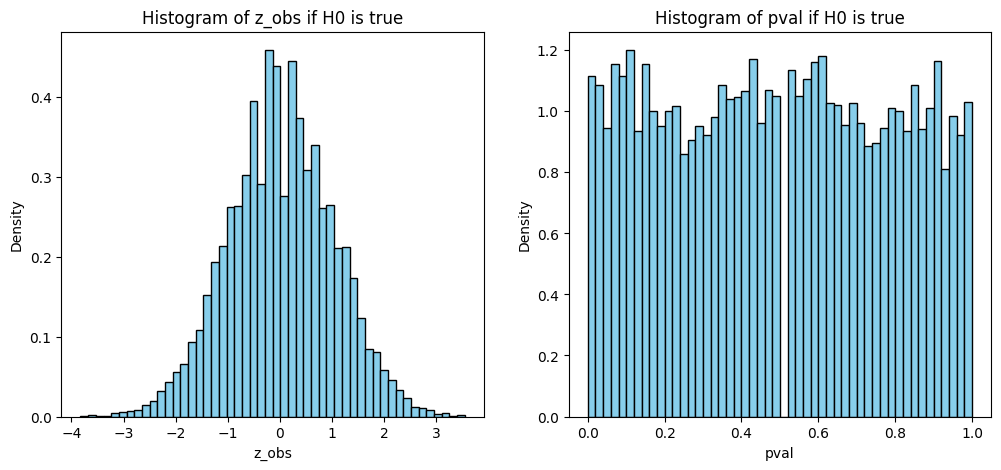

In [7]:
# for storing values of p-value and z
z_obs = np.zeros(n_sim)
pval = np.zeros(n_sim)

for i in range(n_sim):
    x_control, x_treatment = gen_sample(sample_size, 0, 0.2)
    z_obs[i], pval[i] = asy_mean_test(x_control, x_treatment)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(z_obs, bins=50, density=True, color='skyblue', edgecolor='black')
axs[0].set_title("Histogram of z_obs if H0 is true")
axs[0].set_xlabel("z_obs")
axs[0].set_ylabel("Density")

axs[1].hist(pval, bins=50, density=True, color='skyblue', edgecolor='black')
axs[1].set_title("Histogram of pval if H0 is true")
axs[1].set_xlabel("pval")
axs[1].set_ylabel("Density")

plt.show()

Правда ли, что распределение `pvalue` оказалось равномерным на отрезке $[0;1]$? Какое у распределения `z_obs` математическое ожидание? Попытайтесь понятными словами пояснить, почему распределения оказались именно такими.

**Answer:** Yes, that is correct. Under the null hypothesis, the distribution of z_obs is standard normal N(0,1). This happens because z_obs is just the standardized difference between the treatment and control means, and when H_0 is true we expect that difference to have mean 0, with fluctuations explained by normal noise (via the Central Limit Theorem).

As for the p-value, its distribution under H_0 is uniform on [0,1]. The reason is that a p-value is defined as the probability, under the null, of observing a test statistic at least as extreme as the one we got. Mathematically, if a statistic has a continuous distribution under H_0, then transforming it through its cumulative distribution function produces a Uniform(0,1) random variable.

Intuitively: because under the null the observed differences are just random noise that can fluctuate in either direction, all levels of “extremeness” are equally likely once mapped into the p-value scale. That’s why p-values are spread uniformly between 0 and 1 when the null is true.

__в) [1 балл]__ Предположим, что верна альтернативная гипотеза. Доля в тестовой (treatment) выборке оказалась на $20\%$ больше, чем в контрольной. Как при верности нулевой гипотезы будут распределены `pvalue` и `z_obs`?  

С помощью симуляций сгенерируйте $10^4$ выборок размера $1000$, постройте две гистограммы и прокомментируйте получившиеся результаты.

In [8]:
n_sim = 10000
sample_size = 1000
effect = 0.2

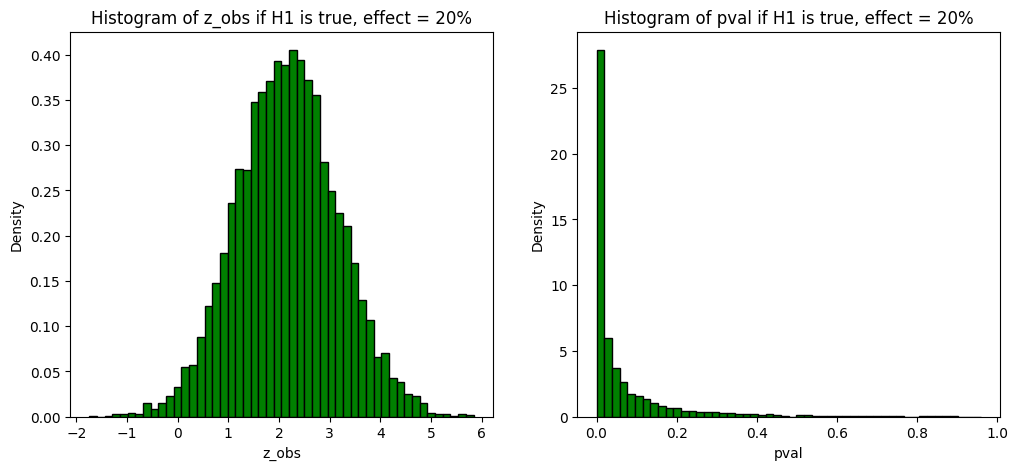

In [9]:
z_obs_20 = np.zeros(n_sim)
pval_20 = np.zeros(n_sim)

for i in range(n_sim):
    x_control, x_treatment = gen_sample(sample_size, effect, 0.2)
    z_obs_20[i], pval_20[i] = asy_mean_test(x_control, x_treatment)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(z_obs_20, bins=50, density=True, color='green', edgecolor='black')
axs[0].set_title("Histogram of z_obs if H1 is true, effect = 20%")
axs[0].set_xlabel("z_obs")
axs[0].set_ylabel("Density")

axs[1].hist(pval_20, bins=50, density=True, color='green', edgecolor='black')
axs[1].set_title("Histogram of pval if H1 is true, effect = 20%")
axs[1].set_xlabel("pval")
axs[1].set_ylabel("Density")

plt.show()

А как будут выглядеть результаты, если доля в тестовой выборке больше на $40\%$? Проведите симуляции.

In [10]:
n_sim = 10000
sample_size = 1000
effect = 0.4

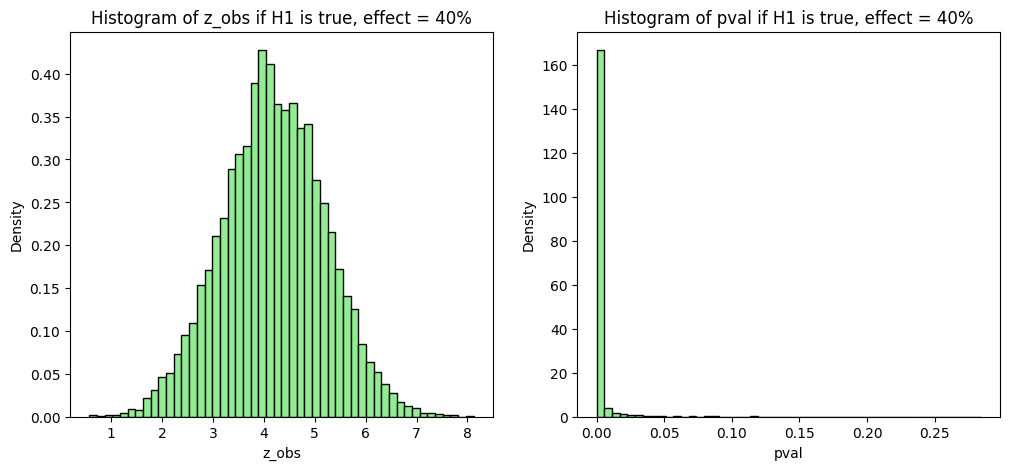

In [11]:
z_obs_40 = np.zeros(n_sim)
pval_40 = np.zeros(n_sim)

for i in range(n_sim):
    x_control, x_treatment = gen_sample(sample_size, effect, 0.2)
    z_obs_40[i], pval_40[i] = asy_mean_test(x_control, x_treatment)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(z_obs_40, bins=50, density=True, color='lightgreen', edgecolor='black')
axs[0].set_title("Histogram of z_obs if H1 is true, effect = 40%")
axs[0].set_xlabel("z_obs")
axs[0].set_ylabel("Density")

axs[1].hist(pval_40, bins=50, density=True, color='lightgreen', edgecolor='black')
axs[1].set_title("Histogram of pval if H1 is true, effect = 40%")
axs[1].set_xlabel("pval")
axs[1].set_ylabel("Density")

plt.show()

Правда ли, что распределение `pvalue` оказалось равномерным на отрезке $[0;1]$? Какое у распределения `z_obs` математическое ожидание? Попытайтесь понятными словами пояснить, почему распределения оказались именно такими.

__Ответ:__ No, it is not true that the distribution of the p-value is Uniform[0,1] when the alternative hypothesis is true. The property of p-values being uniformly distributed holds only under the null hypothesis.

In our simulations with effect sizes of 0.2 and 0.4, the test statistic z_obs has a positive expected value (around 2 in the first case and around 4 in the second). This means the statistic is systematically shifted away from zero. As a result, the probability of observing such values (or more extreme ones) under the assumption that H_0 is true becomes very small.

The larger the observed z_obs (i.e., the stronger the true effect), the more concentrated the p-values become near zero. That is why, instead of being uniformly spread over [0,1], the distribution of p-values under the alternative hypothesis is heavily skewed toward zero.

__г) [1 балл]__ Обычно, перед началом эксперимента, мы фиксируем ошибку первого рода, вероятность отвергнуть нулевую гипотезу, когда она на самом деле верна,  

$$\alpha = \mathbb{P}(H_A \text{ выбрана} \mid H_0 \text{ верна}).$$

Дальше мы принимаем решение, о том, какую гипотезу выбрать, сравнивая `z_obs` с $z_{1 - \alpha},$ либо `pvalue` с $\alpha$ (напомню что мы делаем симуляции для правосторонней альтернативы, поэтому $\alpha$ не надо делить на два).

Давайте проверим для конкретного $\alpha$, что это правда работает. Выберите любое разумное значение $\alpha$. С помощью симуляций сгенерируйте $10^4$ выборок размера $1000$ при верности нулевой гипотезы. Проверьте эти гипотезы и оцените получившееся значение $\alpha$. Правда ли, что оно оказалось равно заявленному значению?

__P.S.__ в идеале, тут надо воспользоваться уже проделанными выше симуляциями.

In [12]:
n_sim = 10000
sample_size = 1000
p_control = 0.2
alpha = 0.05
effect = 0.0

In [13]:
reject_count = 0

for i in range(n_sim):
    x_control, x_treatment = gen_sample(sample_size, effect, p_control)
    _, pval = asy_mean_test(x_control, x_treatment)
    if pval < alpha:
        reject_count += 1

print(reject_count / n_sim)

0.0483


Кроме ошибки первого рода есть ещё и ошибка второго рода, вероятность остаться с нулевой гипотезой, когда верна альтернатива,

$$\beta = \mathbb{P}(H_0 \text{ выбрана} \mid H_A \text{ верна}).$$

Давайте предположим, что доля в тестовой (treatment) выборке оказалась на $20\%$ больше, чем в контрольной. С помощью симуляций того же самого объёма оцените, чему равна $\beta$.

__P.S.__ в идеале, тут надо воспользоваться уже проделанными выше симуляциями.

In [14]:
n_sim = 10000
sample_size = 1000
p_control = 0.2
alpha = 0.05
effect = 0.2

In [15]:
beta = 0
for i in range(n_sim):
    x_control, x_treatment = gen_sample(sample_size, effect, p_control)
    _, pval = asy_mean_test(x_control, x_treatment)
    if pval >= alpha:
        beta += 1

print(beta / n_sim)

0.3082


Теперь доля в тестовой выборке оказалась на $40\%$ больше, чем в контрольной. Чем равна $\beta$ здесь?

In [16]:
effect = 0.4
beta = 0

In [17]:
for i in range(n_sim):
    x_control, x_treatment = gen_sample(sample_size, effect, p_control)
    _, pval = asy_mean_test(x_control, x_treatment)
    if pval >= alpha:
        beta += 1

print(beta / n_sim)

0.0051


Что с ошибкой второго рода происходит при росте эффекта? Что происходит с ней, если при проверке гипотезы взять более маленькое $\alpha$?

__Ответ:__ The larger the true effect, the smaller the probability of a Type II error $\beta$. This is because as the effect grows, the observed difference between the two groups becomes more pronounced and easier to detect statistically, so the chance of mistakenly accepting H_0 decreases. In other words, the test has greater power $1-\beta$ when the effect size is larger.

If we lower the significance level $\alpha$ (make it more stringent), then the rejection region becomes smaller. This reduces the probability of a Type I error, but at the same time it increases the probability of a Type II error $\beta$, because it becomes harder to reject H_0 even when a real effect exists.

__д) [1 балл]__ Ошибки $\alpha$ и $\beta$ связаны между собой. Чем выше, при фиксированном размере выборки и эффекта мы делаем одну, тем ниже другая. Давайте попробуем в рамках проделанных выше симуляций нарисовать взаимосвязь между ошибками.

Выше, для оценки $\beta$ вы сравнивали вектор `pval` с зафиксированным значением `alpha`.  Переберите `alpha` по циклу от 0 до 1 с шагом 0.01 и оцените для каждого значения `alpha` значение `beta`.

Нарисуйте получившуюся взаимосвязь на графике для эффекта в 20% и 40%. Какая из кривых идёт ниже?

In [18]:
p_values = []
p_values_20 = []
p_values_40 = []

In [19]:
# no effect
for i in range(n_sim):
    x_control, x_treatment = gen_sample(sample_size, 0, 0.2)
    _, pval = asy_mean_test(x_control, x_treatment)
    p_values.append(pval)

In [20]:
# 20% effect
for i in range(n_sim):
    x_control, x_treatment = gen_sample(sample_size, 0.2, 0.2)
    _, pval = asy_mean_test(x_control, x_treatment)
    p_values_20.append(pval)

In [21]:
# 40% effect
for i in range(n_sim):
  x_control, x_treatment = gen_sample(sample_size, 0.4, 0.2)
  _, pval = asy_mean_test(x_control, x_treatment)
  p_values_40.append(pval)

In [22]:
alphas_grid = np.arange(0, 1, 0.01)
betas = []
betas_20 = []
betas_40 = []

for alpha in alphas_grid:
  betas.append(np.mean(np.array(p_values) < alpha))
  betas_20.append(np.mean(np.array(p_values_20) >= alpha))
  betas_40.append(np.mean(np.array(p_values_40) >= alpha))

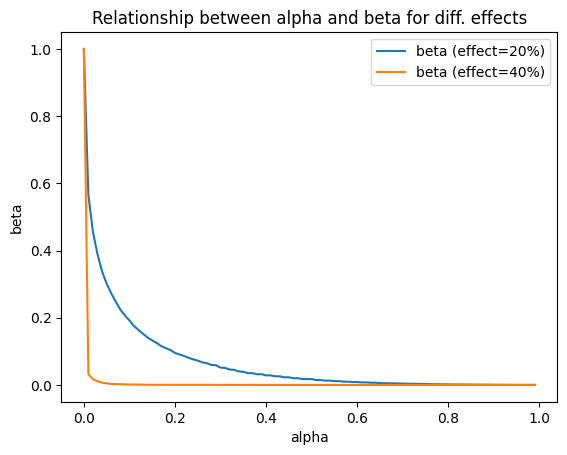

In [23]:
plt.plot(alphas_grid, betas_20, label='beta (effect=20%)')
plt.plot(alphas_grid, betas_40, label='beta (effect=40%)')
plt.title('Relationship between alpha and beta for diff. effects')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.legend()
plt.show()

Нарисуйте точно такую же кривую для ситуации, когда была верна нулевая гипотеза.

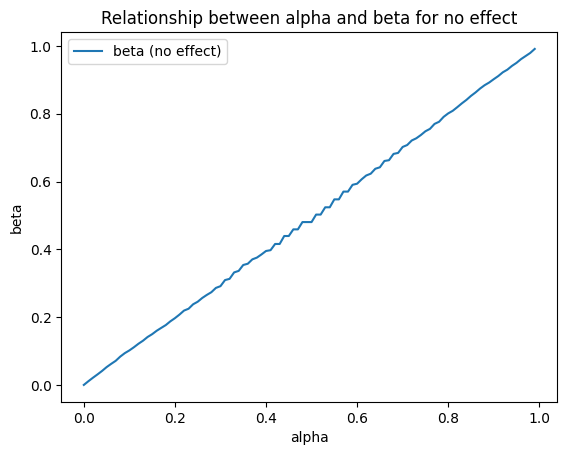

In [24]:
plt.plot(alphas_grid, betas, label='beta (no effect)')
plt.title('Relationship between alpha and beta for no effect')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.legend()
plt.show()

Вместо осей $(\alpha, \beta)$ обычно такой график рисуют в осях $(\alpha, 1 - \beta)$. Давайте построим его и проинтерпретируем.

In [25]:
def plot_pvalue_distribution(dict_pvalues):
    xseq = np.linspace(0, 1, 1000)

    for key, pvalues in dict_pvalues.items():
        yseq = [np.mean(pvalues < x) for x in xseq]
        plt.plot(xseq, yseq, label=key)

    plt.plot([0, 1], [0, 1], '--k', alpha=0.8)
    plt.title('Distribution p-value/ROC-curve', size=16)
    plt.xlabel('alpha', size=12)
    plt.ylabel('1 - beta', size=12)
    plt.legend(fontsize=12)
    plt.grid()

Заполните пропуски в коде ниже, чтобы для нашего АБ-теста отрисовались ROC-кривые.

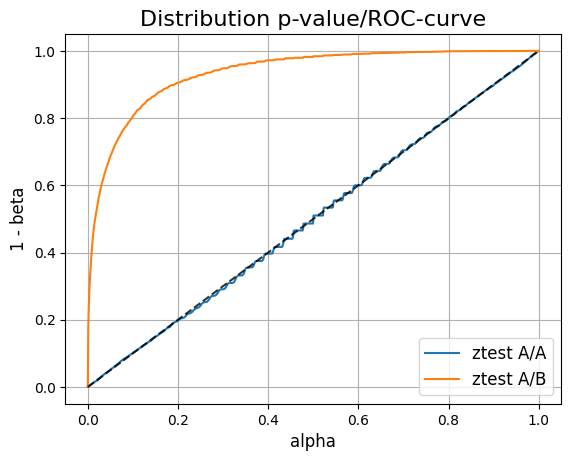

In [26]:
n_sim = 10**4
sample_size = 1000

dict_pvalues = defaultdict(list)
for _ in range(n_sim):

    x_control, x_treatment = gen_sample(sample_size, 0.2, 0.2)
    z_obs_ab, pval_ab = asy_mean_test(x_control, x_treatment)

    x_control_again, _ = gen_sample(1000, 0, 0.2)
    z_obs_aa, pval_aa = asy_mean_test(x_control, x_control_again)

    dict_pvalues['ztest A/A'].append(pval_aa)
    dict_pvalues['ztest A/B'].append(pval_ab)

plot_pvalue_distribution(dict_pvalues)

Получившийся график можно проинтерпретировать двумя способами. Мы много-много раз проводим АБ-тест. В начале теста мы зафиксировали какую-то $\alpha$ и дальше проверяем кучу гипотез.

1. Линия `ztest A/A` это функция распределения pvalue при верности нулевой гипотезы. Оно было равномерным, мы двигаем $\alpha$ по оси $OX$ и оцениваем $\mathbb{P}(\text{pvalue} \le \alpha) = F(\alpha)$.  

По аналогии, линия `ztest A/B` это функция распределения pvalue при верности альтернативной гипотезы.

2. Линию `ztest A/B` можно проинтерпретировать как ROC-кривую. Если вы уже знаете про задачу классификации из машинного обучения, то это ровно оно. Полнота это $1 - \beta$, то есть то, сколько верных альтернативных гипотез мы найдём, если будем использовать наш АБ-тест, FPR это $\alpha$, то есть то, сколько верных нулевых гипотез мы заберём с собой в альтернативные. Эту величину мы определяем до старта эксперимента.

> Важно: если вы не поняли интерпретацию из пункта 2, просто забейте. Заботаете МО, поймёте. Интерпретацию из пункта 1 должны понять все. Если вы её не поняли, время напрячься и подумать ещё разок.

__Что для нас важно:__

- Чем выпуклее график, тем лучше мы находим эффект и процедура проверки гипотезы работае корректно;
- Чем больше у нас наблюдений тем выпуклее график;
- Чем сильнее в тестовой выборке подскакивает $p_t$ при изменениях, тем легче нам найти эффект и тем выпуклее график;
- Если $p_t$ подскочило на очень маленькую величину, нам сложнее найти это изменение, и график будет менее выпуклым;
- Чем меньше в выборках дисперсия, тем выпуклее график.

__е) [2 балла]__ При верности альтернативной гипотезы, постройте ROC-кривые из пункта выше для разного числа наблюдений в выборке: 10, 100, 1000, 10000 при любом фиксированном эффекте.

/tmp/ipython-input-3583888447.py:11: RuntimeWarning: invalid value encountered in scalar divide
  z_obs = exp_diff / np.sqrt((var_treatment / n_treatment) + (var_control / n_control))


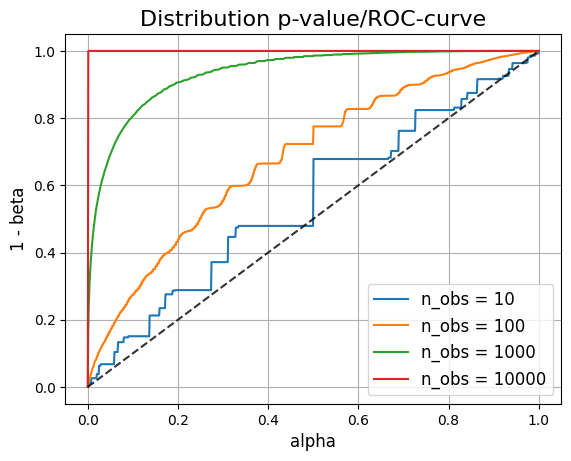

In [27]:
effect = 0.2
dict_p_values = defaultdict(list)
n_sim = 10000

for n_obs in [10, 100, 1000, 10000]:
  for _ in range(n_sim):
    x_control, x_treatment = gen_sample(n_obs, effect, 0.2)
    _, pval = asy_mean_test(x_control, x_treatment)
    dict_p_values['n_obs = ' + str(n_obs)].append(pval)

plot_pvalue_distribution(dict_p_values)

__ё) [1 балл]__ Количество наблюдений, ошибка 1 и 2 рода, размер эффекта, который мы ищем и дисперсия в выборках связаны между собой. Для некоторых критериев проверки гипотез можно вывести формулы, которые их связывают.

В данном случае, формула для расчета числа наблюдений _для одной группы_ выглядит вот так:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

В приложении Яндекс.Такси в конце поездки вылезают рандомные опросники. В одном из опросников задаётся вопрос «А вы пристёгивались, когда ехали?»

В России, в день, в Такси происходит 1 миллион заказов. Вопрос про ремни задаётся рандомным 10% пользователей, закончивших поездку. Пользователь не игнорирует опросник и отвечает на него да или нет с вероятностью 5% (цифры взяты из головы и не отражают реальную статистику).

Менеджер Екатерина хочет сделать так, чтобы когда пассажир садится в машину, Алиса просила его пристегнуться. Хочется замерить, какой эффект это даст на пристёгивания. Станут ли люди чаще пристёгиваться. Замерять мы это будем опросником. Сейчас 10% пользователей говорят, что пристегнулись.

Екатерина пришла к вам и между вами состоялся следующий диалог:

- Хочу АБ-тест с разбивкой 50 на 50.
- Какие ошибки 1 и 2 рода хочешь?
- Нулевые.
- Нам надо бесконечно наблюдений, готова столько ждать?
- Нет.
- На сколько мы хотим, чтобы выросла доля ответов да?
- Если подрастёт хотябы на процент, будет круто.
- То есть если меньше процента, такой эффект считаем неудачей и отсутствием изменения?
- Да.
- Давай я нарисую тебе табличку с разными ошибками, а внутри на пересечении напишу сколько дней надо ждать, чтобы найти такой минимальный эффект.
- Давай, по ней и примем решение.

Нарисуйте для Екатерины такую табличку. Не забудьте перевести общее количество наблюдений в дни.

In [51]:
from math import ceil
from scipy import stats

In [52]:
p_A = 0.10     # baseline
p_B = 0.11     # target uplift
MDE = 0.01     # absolute (percentage points)

answers_per_day = 1_000_000 * 0.10 * 0.05  # 10% shown * 5% respond
per_group = answers_per_day / 2            # 50/50 split

bern_var_A = p_A * (1 - p_A)
bern_var_B = p_B * (1 - p_B)
sum_ber = bern_var_A + bern_var_B          # σ_A^2 + σ_B^2

alphas = [0.01, 0.05, 0.10]
betas  = [0.01, 0.05, 0.10]

n_obs_res_days = []

for alpha in alphas:
    row = []
    for beta in betas:
        z_alpha = stats.norm.ppf(1 - alpha/2)  # two-sided
        z_beta  = stats.norm.ppf(1 - beta)
        n_obs = (sum_ber * (z_alpha + z_beta)**2) / (MDE**2)  # per group
        days  = ceil(n_obs / per_group)
        row.append(days)
    n_obs_res_days.append(row)

In [53]:
df = pd.DataFrame(n_obs_res_days, columns=[f"beta={b}" for b in betas], index=[f"alpha={a}" for a in alphas])
df

,beta=0.01,beta=0.05,beta=0.1
alpha=0.01,19,14,12
alpha=0.05,14,10,8
alpha=0.1,12,9,7


__ж) [1 балл]__ Попробуем сломать наш АБ-тест. Когда мы используем z-тест, мы размышляем в терминах центральной предельной теоремы. Тест будет работать, если выполнены предпосылки ЦПТ:

- Наблюдения независимо одинаково распределены
- В данных нет выборосов, дисперсия конечная
- Данных много

Давайте сломаем одно из условий и попробуем собрать выборку из [распределения Парето](https://ru.wikipedia.org/wiki/Распределение_Парето).

In [29]:
def gen_sample(n_obs, effect, b=0.5):
    x_control = stats.pareto(b=b).rvs(n_obs)
    x_treatment = stats.pareto(b=b).rvs(n_obs)
    x_treatment = (1 + effect) * x_treatment
    return x_control, x_treatment

Отрисуйте ROC-кривые для $b=3$, $b=1$, $b=0.5$

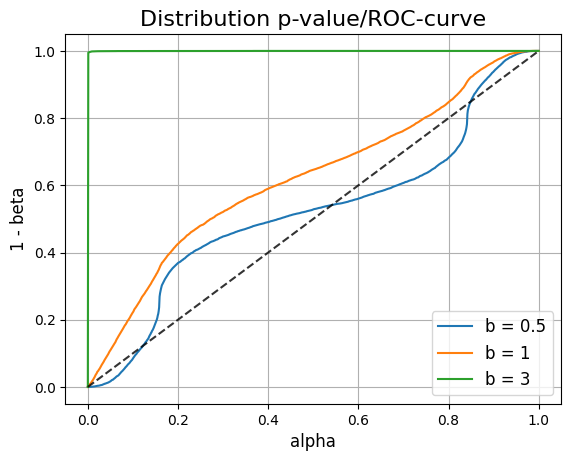

In [54]:
bs = [0.5, 1, 3]
dict_p_values = defaultdict(list)
n_sim = 10000

for b in bs:
  for _ in range(n_sim):
    x_control, x_treatment = gen_sample(1000, effect, b)
    _, pval = asy_mean_test(x_control, x_treatment)
    dict_p_values['b = ' + str(b)].append(pval)

plot_pvalue_distribution(dict_p_values)

Возьмите при каждом $b$ одну выборку, нарисуйте для неё гистограмму и посмотрите как обстоят дела с выбросами.

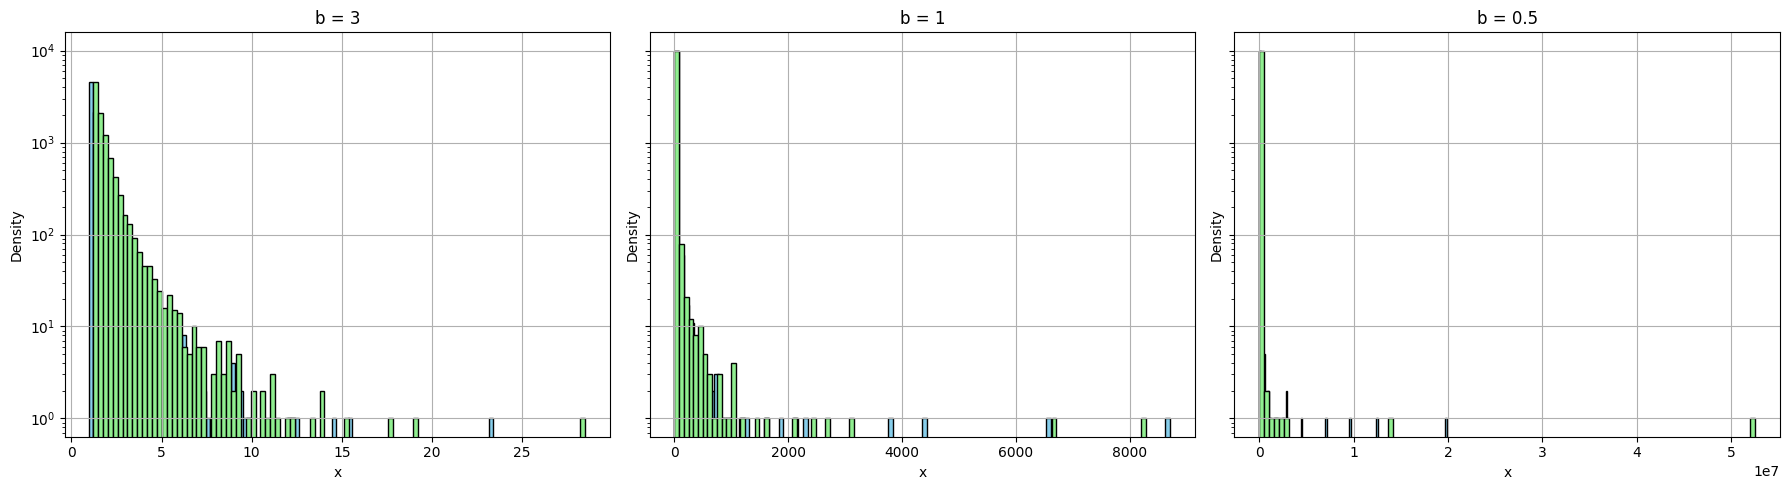

In [64]:
b_values = [3, 1, 0.5]
sample_size = 10000

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, b in enumerate(b_values):
  x_c, x_t = gen_sample(sample_size, 0.2, b)
  axs[i].hist(x_c, bins=100, color='skyblue', edgecolor='black', label='control', log=True)
  axs[i].hist(x_t, bins=100, color='lightgreen', edgecolor='black', label='treatment', log=True)
  axs[i].set_title(f"b = {b}")
  axs[i].set_xlabel("x")
  axs[i].set_ylabel("Density")
  axs[i].grid(True)

plt.tight_layout()
plt.show()

As the parameter b in the Pareto distribution decreases, the tail becomes heavier and the outliers more extreme:
1. When b = 3: The distribution is moderate. Most values are concentrated close to 1, outliers are rare and not very large. The variance is finite, so the z-test works reliably.
2. When b = 1: Very large outliers begin to appear, reaching tens or even hundreds
of thousands. The variance is already infinite, although the mean still exists. The z-test starts to fail because the sample mean becomes unstable.
3. When b = 0.5: The bulk of the data is still near 1, but there are isolated values in the billions. Neither the mean nor the variance exists. The z-test is not applicable at all, because the Central Limit Theorem does not hold under such conditions.

У распределения Парето не всегда существует дисперсия. Это ломает предпосылки ЦПТ и АБ-тест разваливается.